# Salary Range Prediction

Step 1: Load and Inspect the Dataset

In [56]:
import pandas as pd

# Load the dataset
file_path = 'Jobs_NYC_Postings.xlsx'
df = pd.read_excel(file_path)

# Display basic information about the dataset
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Job ID                         5120 non-null   int64         
 1   Agency                         5120 non-null   object        
 2   Posting Type                   5120 non-null   object        
 3   # Of Positions                 5120 non-null   int64         
 4   Business Title                 5120 non-null   object        
 5   Civil Service Title            5120 non-null   object        
 6   Title Classification           5120 non-null   object        
 7   Title Code No                  5120 non-null   object        
 8   Level                          5120 non-null   object        
 9   Job Category                   5120 non-null   object        
 10  Full-Time/Part-Time indicator  5003 non-null   object        
 11  Career Level     

In [57]:
print(df.head())

   Job ID                         Agency Posting Type  # Of Positions  \
0  623668  DEPT OF HEALTH/MENTAL HYGIENE     External               1   
1  608193  DEPT OF DESIGN & CONSTRUCTION     Internal               1   
2  625094  DEPT OF DESIGN & CONSTRUCTION     Internal               1   
3  580593   DEPARTMENT OF TRANSPORTATION     External               1   
4  624937  DEPT OF HEALTH/MENTAL HYGIENE     External               1   

                                      Business Title  \
0  Research Analyst, IMAT, Bureau of Maternal Inf...   
1                                    Deputy Director   
2                             Senior Project Manager   
3                              Procurement Analyst 2   
4  Deputy Director, HIV Planning Council, Divisio...   

              Civil Service Title Title Classification Title Code No Level  \
0         CITY RESEARCH SCIENTIST    Non-Competitive-5         21744     2   
1  ADMINISTRATIVE PROJECT MANAGER        Competitive-1         8300B

Step 2: Data Preprocessing

In [58]:
# Handle missing values
df = df.dropna(subset=['Salary Range From', 'Salary Range To'])  # Remove rows with missing salary info

# Convert salary columns to numeric if not already
df['Salary Range From'] = pd.to_numeric(df['Salary Range From'], errors='coerce')
df['Salary Range To'] = pd.to_numeric(df['Salary Range To'], errors='coerce')

# Fill remaining missing values if needed
df = df.fillna('Unknown')

# Display basic statistics
print(df.describe())


              Job ID  # Of Positions  Salary Range From  Salary Range To  \
count    5120.000000     5120.000000        5120.000000      5120.000000   
mean   598721.366211        2.070898       64625.224123     89978.575734   
min    469953.000000        1.000000           0.000000        15.000000   
25%    586358.000000        1.000000       51869.000000     64608.000000   
50%    607060.000000        1.000000       62397.000000     85147.000000   
75%    621404.000000        1.000000       80557.000000    113550.000000   
max    628806.000000      150.000000      225000.000000    252165.000000   
std     28274.636161        5.799227       31378.516179     46732.299939   

                        Posting Date                Posting Updated  \
count                           5120                           5120   
mean   2023-08-20 16:08:37.499999744  2023-09-23 21:18:16.875000320   
min              2020-06-30 00:00:00            2021-10-22 00:00:00   
25%              2023-06-01 00:

Step 3: Exploratory Data Analysis (EDA)

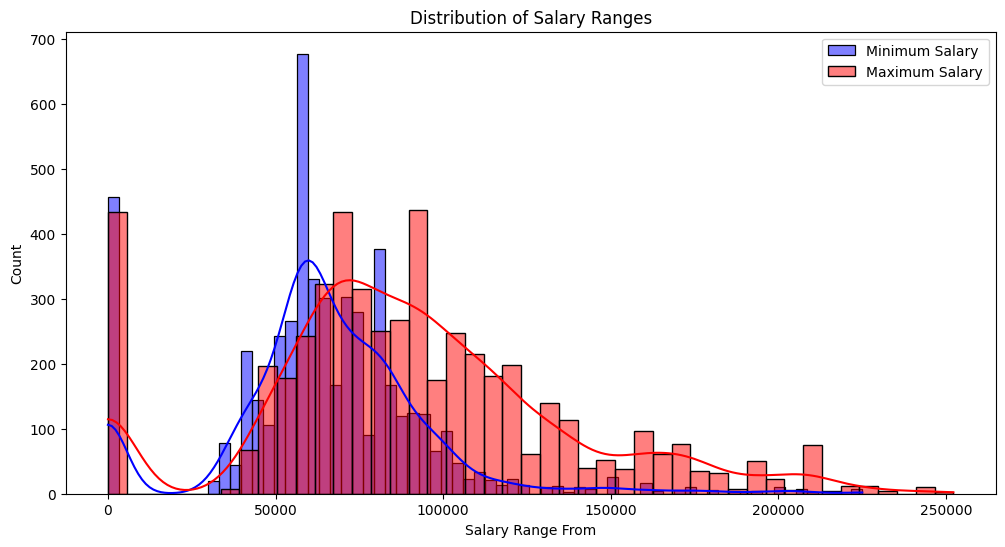

<Figure size 1400x700 with 0 Axes>

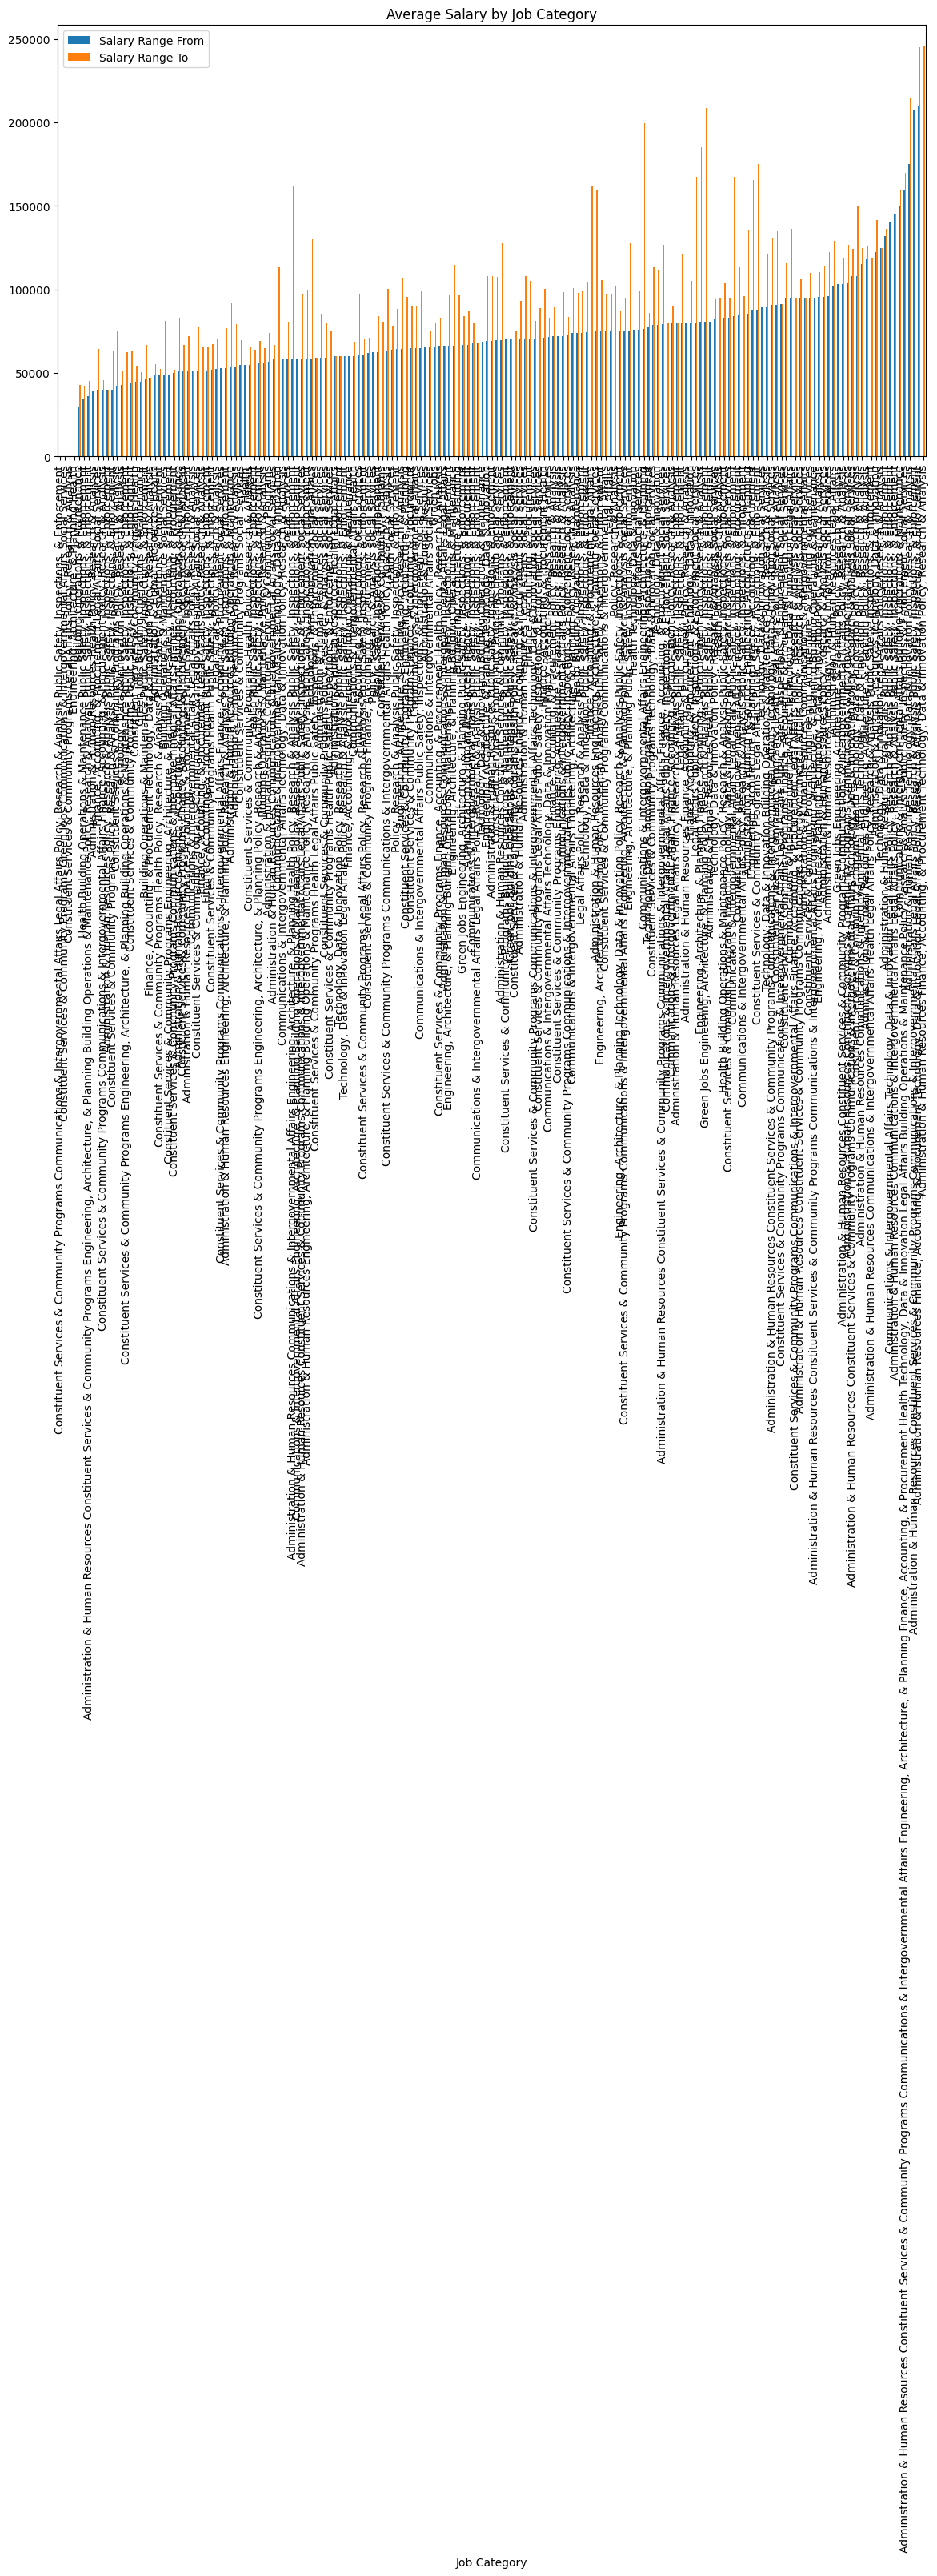

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of salary ranges
plt.figure(figsize=(12, 6))
sns.histplot(df['Salary Range From'], kde=True, color='blue', label='Minimum Salary')
sns.histplot(df['Salary Range To'], kde=True, color='red', label='Maximum Salary')
plt.legend()
plt.title('Distribution of Salary Ranges')
plt.show()

# Job categories and their average salaries
plt.figure(figsize=(14, 7))
avg_salaries = df.groupby('Job Category')[['Salary Range From', 'Salary Range To']].mean().sort_values(by='Salary Range From')
avg_salaries.plot(kind='bar', figsize=(14, 7))
plt.title('Average Salary by Job Category')
plt.show()


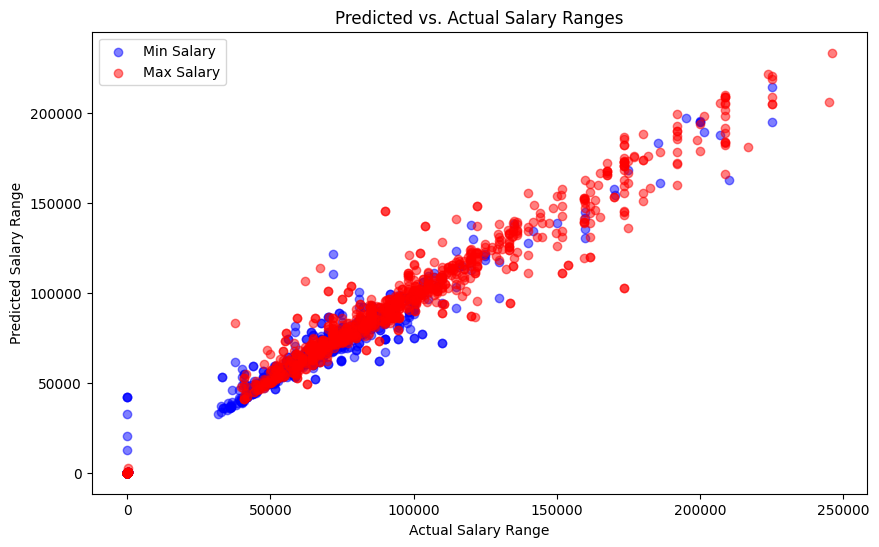

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_min, y_pred_min, color='blue', label='Min Salary', alpha=0.5)
plt.scatter(y_test_max, y_pred_max, color='red', label='Max Salary', alpha=0.5)
plt.xlabel('Actual Salary Range')
plt.ylabel('Predicted Salary Range')
plt.title('Predicted vs. Actual Salary Ranges')
plt.legend()
plt.show()


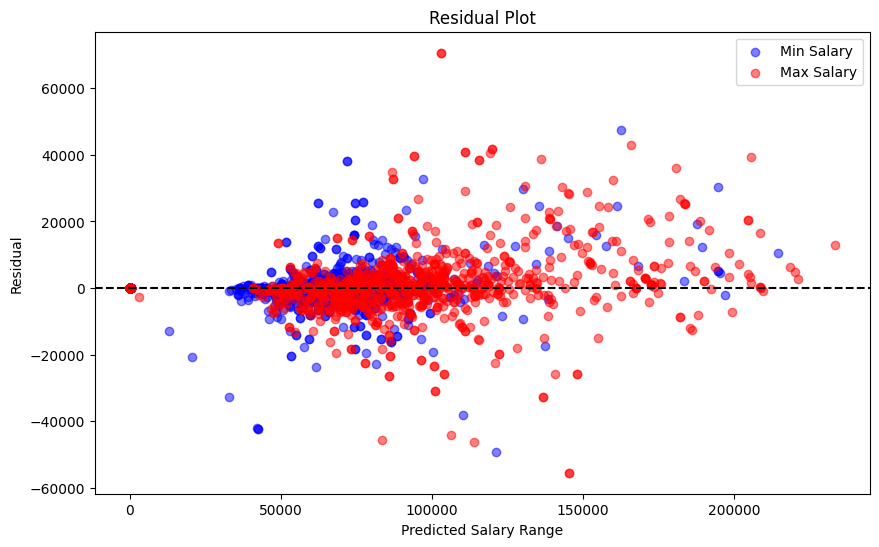

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_min, y_test_min - y_pred_min, color='blue', label='Min Salary', alpha=0.5)
plt.scatter(y_pred_max, y_test_max - y_pred_max, color='red', label='Max Salary', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Salary Range')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.legend()
plt.show()


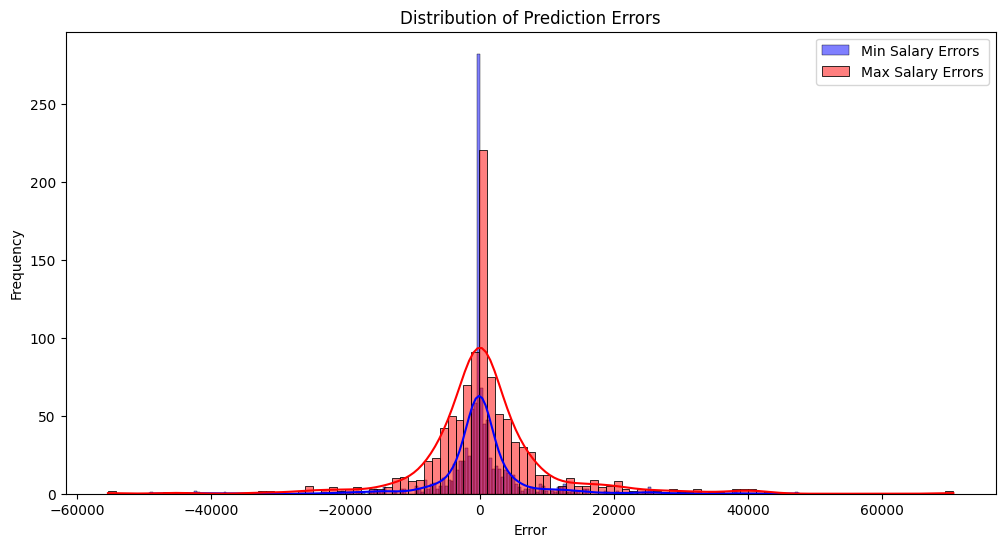

In [62]:
errors_min = y_test_min - y_pred_min
errors_max = y_test_max - y_pred_max

plt.figure(figsize=(12, 6))
sns.histplot(errors_min, kde=True, color='blue', label='Min Salary Errors')
sns.histplot(errors_max, kde=True, color='red', label='Max Salary Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.legend()
plt.show()


Step 4: Model Building

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


# Select relevant columns and drop rows with missing salary information
df = df[['Job ID', 'Agency', 'Business Title', 'Civil Service Title', 'Title Classification', 'Job Category', 
         'Full-Time/Part-Time indicator', 'Career Level', 'Salary Range From', 'Salary Range To', 'Salary Frequency', 
         'Work Location', 'Division/Work Unit', 'Minimum Qual Requirements', 'Preferred Skills']]
df = df.dropna(subset=['Salary Range From', 'Salary Range To'])

# Convert categorical columns to numerical
categorical_cols = ['Agency', 'Business Title', 'Civil Service Title', 'Title Classification', 'Job Category', 
                    'Full-Time/Part-Time indicator', 'Career Level', 'Salary Frequency', 'Work Location', 
                    'Division/Work Unit', 'Minimum Qual Requirements', 'Preferred Skills']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features and target
X = df.drop(columns=['Salary Range From', 'Salary Range To'])
y_min = df['Salary Range From']
y_max = df['Salary Range To']

# Split the data into training and testing sets
X_train, X_test, y_train_min, y_test_min, y_train_max, y_test_max = train_test_split(X, y_min, y_max, test_size=0.2, random_state=42)

# Initialize the model
model_min = RandomForestRegressor(n_estimators=100, random_state=42)
model_max = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_min.fit(X_train, y_train_min)
model_max.fit(X_train, y_train_max)

# Predict on the test set
y_pred_min = model_min.predict(X_test)
y_pred_max = model_max.predict(X_test)

# Evaluate the model
mae_min = mean_absolute_error(y_test_min, y_pred_min)
mae_max = mean_absolute_error(y_test_max, y_pred_max)

(mae_min, mae_max)


(3395.3143189472657, 5831.204031044923)

Step 5: Model Evaluation

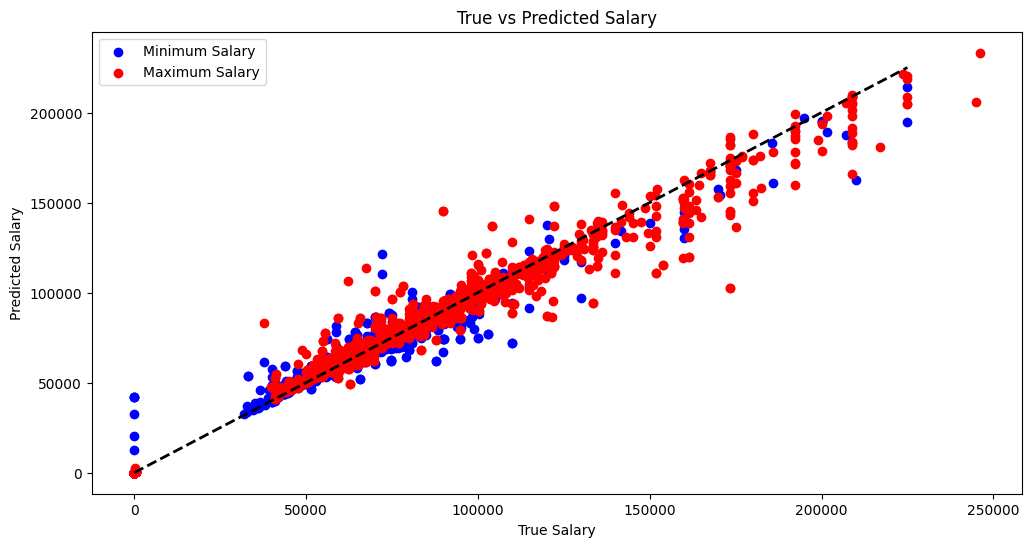

In [64]:
# Plotting true vs predicted salaries
plt.figure(figsize=(12, 6))
plt.scatter(y_test_min, y_pred_min, color='blue', label='Minimum Salary')
plt.scatter(y_test_max, y_pred_max, color='red', label='Maximum Salary')
plt.plot([y_test_min.min(), y_test_min.max()], [y_test_min.min(), y_test_min.max()], 'k--', lw=2)
plt.xlabel('True Salary')
plt.ylabel('Predicted Salary')
plt.title('True vs Predicted Salary')
plt.legend()
plt.show()


In [65]:
print(f'Mean Absolute Error (Min Salary): {mae_min:.2f}')
print(f'Mean Absolute Error (Max Salary): {mae_max:.2f}')



Mean Absolute Error (Min Salary): 3395.31
Mean Absolute Error (Max Salary): 5831.20


In [66]:
import pandas as pd

# Load your Excel file
file_path = 'Jobs_NYC_Postings.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# Display the column names to identify the date-related column
print(df.columns)



Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Classification', 'Title Code No', 'Level',
       'Job Category', 'Full-Time/Part-Time indicator', 'Career Level',
       'Salary Range From', 'Salary Range To', 'Salary Frequency',
       'Work Location', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')


Hyperparameter tuning

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import randint

# Assuming df is DataFrame with relevant features and target
# Example of adding Log_Salary_From and Log_Salary_To features
df['Log_Salary_From'] = np.log(df['Salary Range From'] + 1)  # Adding 1 to avoid log(0) and handling negative values
df['Log_Salary_To'] = np.log(df['Salary Range To'] + 1)      # Adding 1 to avoid log(0) and handling negative values

# Verify column names and existence
required_columns = ['# Of Positions', 'Log_Salary_From', 'Log_Salary_To']  # Ensure all required columns are present

for col in required_columns:
    if col not in df.columns:
        raise KeyError(f"Column '{col}' not found in DataFrame.")

# Define features and target
X = df[required_columns]
y = df['Salary Range To']

# Check for infinite or large values
if np.any(np.isinf(X)) or np.any(np.abs(X) > 1e10):  # Adjust threshold as per data
    raise ValueError("Input data contains infinite or very large values.")

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2']  # Adjusted max_features options
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100,
                                   cv=5, scoring='neg_mean_absolute_error', random_state=42, n_jobs=-1, error_score=np.nan)

random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Mean Absolute Error:", -random_search.best_score_)

# Evaluate best model on validation set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print("Mean Absolute Error on Validation Set:", mae)


Best Parameters: {'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 196}
Best Mean Absolute Error: 322.76959133226376
Mean Absolute Error on Validation Set: 271.3372097955199


In [72]:
from sklearn.metrics import mean_squared_error, r2_score

mse_min = mean_squared_error(y_test_min, y_pred_min)
rmse_min = mean_squared_error(y_test_min, y_pred_min, squared=False)
r2_min = r2_score(y_test_min, y_pred_min)

print(f'Mean Squared Error (Min Salary): {mse_min:.2f}')
print(f'Root Mean Squared Error (Min Salary): {rmse_min:.2f}')
print(f'R-squared (Min Salary): {r2_min:.2f}')


Mean Squared Error (Min Salary): 47816441.97
Root Mean Squared Error (Min Salary): 6914.94
R-squared (Min Salary): 0.95


c:\Users\user\Downloads\python\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
